In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 14000)
pd.set_option("display.max_columns", 101)


import warnings
warnings.filterwarnings('ignore')

    1. Join all the files

In [2]:
bill_amount_df = pd.read_csv('bill_amount.csv')
bill_amount_df.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [3]:
bill_id_df = pd.read_csv('bill_id.csv')
bill_id_df.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [4]:
clinical_data_df = pd.read_csv('clinical_data.csv')
clinical_data_df.rename(columns = {'id':'patient_id'}, inplace = True)
print(clinical_data_df.shape)
clinical_data_df.head()

(3400, 26)


,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [5]:
# clinical_data_df[clinical_data_df.patient_id == 'feb52392f4d58a02254cbd0ba634312f']

In [6]:
# x = clinical_data_df.groupby(['patient_id'])[['medical_history_1']].count()
# x[x.medical_history_1 > 1]
# # x.medical_history_1.max()

In [7]:
demographics_df = pd.read_csv('demographics.csv')
print(demographics_df.shape)
demographics_df.head()

(3000, 5)


,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [8]:
print(bill_id_df.shape)
print(bill_amount_df.shape)
print(demographics_df.shape)
print(clinical_data_df.shape)

(13600, 3)
(13600, 2)
(3000, 5)
(3400, 26)


In [9]:
# print(bill_id_df.patient_id.nunique())

In [10]:
# clinical_data_df -> bill_amount_df -> bill_id_df -> demographics_df

In [11]:
bill_df = bill_id_df.merge(bill_amount_df, on  = 'bill_id')
bill_df.head()

,bill_id,patient_id,date_of_admission,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902


In [12]:
bill_demo_df = bill_df.merge(demographics_df, on = 'patient_id')
bill_demo_df.head()

,bill_id,patient_id,date_of_admission,amount,gender,race,resident_status,date_of_birth
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467,Male,Indian,Singaporean,1976-12-19
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972,Male,Indian,Singaporean,1976-12-19
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902,Male,Indian,Singaporean,1976-12-19
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,982.332324,Male,Indian,Singaporean,1976-12-19
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1498.125668,Male,Indian,Singaporean,1976-12-19


In [13]:
COLS = ['patient_id', 'date_of_admission', 'gender','race', 'resident_status', 'date_of_birth']
bill_demo_agg_df = bill_demo_df.groupby(COLS)[['amount']].sum().reset_index().rename(columns = {'amount':'total_amount'})

In [14]:
# x = bill_demo_agg_df.groupby(['patient_id','date_of_admission'])[['total_amount']].count()
# x[x.total_amount > 1]

In [15]:
# bill_demo_agg_df[bill_demo_agg_df.patient_id=='00225710a878eff524a1d13be817e8e2']

In [16]:
df = clinical_data_df.merge(bill_demo_agg_df, on = ['patient_id','date_of_admission'], how = 'inner')
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907


In [17]:
print(df.duplicated().sum())
print(df.duplicated('patient_id').sum())
print(df.duplicated(['patient_id','date_of_admission']).sum())

0
400
0


In [18]:
# df[df.duplicated('patient_id')]

In [19]:
# df[df.patient_id=='53e59764db1e2e8a2921d4ea65f96355']

    2. Compute age of the patients: patient_age

In [20]:
df.head()
from datetime import datetime
df['patient_age'] = datetime.today().year - pd.to_datetime(df.date_of_birth, format = '%Y-%m-%d').dt.year
df.loc[:,['date_of_birth','patient_age']].head()

,date_of_birth,patient_age
0,1976-12-19,45
1,1978-07-20,43
2,1967-08-14,54
3,1967-12-06,54
4,1982-07-18,39


In [21]:
# datetime.today() 

In [22]:
# print(pd.to_datetime('2021-10-09', format = '%Y-%m-%d'))
# print(pd.to_datetime('21-10-09', format = '%y-%m-%d'))
# print(pd.to_datetime('2021-oct-09', format = '%Y-%b-%d'))
# print(pd.to_datetime('2021-october-09', format = '%Y-%B-%d').strftime('%Y-%b-%d'))

In [23]:
# pd.to_datetime('2021-10-09', format = '%Y-%m-%d') - pd.to_datetime('2010-10-09', format = '%Y-%m-%d')  

    3. Replace Male -> ‘M’, female -> ‘F’

In [24]:
df['gender_E'] = df.gender.apply(lambda g: 'F' if g.lower() in ('f','female') else 'M')
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665,45,M
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924,43,F
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088,54,F
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530,54,F
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907,39,F


    4. Delete duplicate details of a patient

In [25]:
x = df.sort_values(['patient_id','date_of_admission']).drop_duplicates('patient_id')
x[x.patient_id == 'feb52392f4d58a02254cbd0ba634312f']

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E
59,feb52392f4d58a02254cbd0ba634312f,2011-02-05,2011-02-15,0,1.0,No,0,1.0,1,0,1,0,1,1,1,1,1,0,0,1,0,15.9,25.8,96.0,85.0,166.0,Female,Malay,Singaporean,1979-04-14,16760.752525,42,F


    5. Get patient distribution by Race

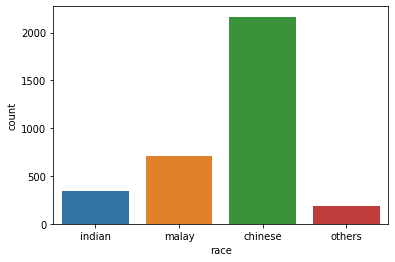

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.race.apply(lambda x: 'indian' if x == 'India' else x.lower()))
plt.show()

    6. Get patient distribution by resident_status

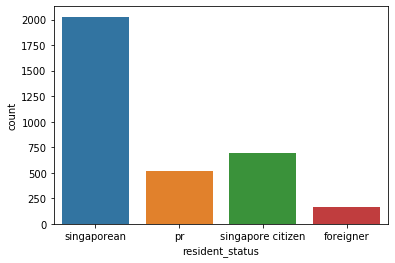

In [27]:
sns.countplot(df.resident_status.apply(lambda x: x.lower()))
plt.show()

    7. What is sum,average, max, min bill amount expensed by each patient

In [28]:
df.groupby('patient_id')[['total_amount']].describe().head()

total_amount                                  \
                                        count          mean std           min   
patient_id                                                                      
00225710a878eff524a1d13be817e8e2          1.0   5190.566695 NaN   5190.566695   
0029d90eb654699c18001c17efb0f129          1.0  22601.497872 NaN  22601.497872   
0040333abd68527ecb53e1db9073f52e          1.0  17447.181635 NaN  17447.181635   
00473b58e3dc8ae37b3cb34069705083          1.0  15285.883220 NaN  15285.883220   
0078662d1d983dde68ea057c42d5b5cf          1.0  73477.869010 NaN  73477.869010   

                                                                            \
                                           25%           50%           75%   
patient_id                                                                   
00225710a878eff524a1d13be817e8e2   5190.566695   5190.566695   5190.566695   
0029d90eb654699c18001c17efb0f129  22601.497872  22601.497872  22601.497872   
0040333abd68527ecb53e1db9073f52e  17447.181635  17447.181635  17447.181635   
00473b58e3dc8ae37b3cb34069705083  15285.883220  15285.883220  15285.883220   
0078662d1d983dde68ea057c42d5b5cf  73477.869010  73477.869010  73477.869010   

                                                
                                           max  
patient_id                                      
00225710a878eff524a1d13be817e8e2   5190.566695  
0029d90eb654699c18001c17efb0f129  22601.497872  
0040333abd68527ecb53e1db9073f52e  17447.181635  
00473b58e3dc8ae37b3cb34069705083  15285.883220  
0078662d1d983dde68ea057c42d5b5cf  73477.869010

    8. What is the average stay days of a patient in hospital

In [30]:
df['days_in_clinic'] = pd.to_datetime(df.date_of_discharge, format = '%Y-%m-%d') - pd.to_datetime(df.date_of_admission, format = '%Y-%m-%d')

df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E,days_in_clinic
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665,45,M,10 days
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924,43,F,10 days
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088,54,F,11 days
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530,54,F,12 days
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907,39,F,8 days


In [31]:
df['days_in_clinic_int'] = df.days_in_clinic.apply(lambda x: str(x).split(' ')[0]).astype(int)
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E,days_in_clinic,days_in_clinic_int
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665,45,M,10 days,10
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924,43,F,10 days,10
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088,54,F,11 days,11
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530,54,F,12 days,12
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907,39,F,8 days,8


In [32]:
# df.days_in_clinic_int.mean()

In [33]:
df.groupby('patient_id')[['days_in_clinic_int']].mean()

,days_in_clinic_int
patient_id,
00225710a878eff524a1d13be817e8e2,12.000000
0029d90eb654699c18001c17efb0f129,13.000000
0040333abd68527ecb53e1db9073f52e,12.000000
00473b58e3dc8ae37b3cb34069705083,5.000000
0078662d1d983dde68ea057c42d5b5cf,12.000000
0088bbd94c90bbc9158e13465441ebb6,10.000000
0092d20dd0719e88ecfdd02d5e7ca7b7,11.000000
01081b8bcb0f9e27b888d23bb35a50dd,10.000000
010cf28233f50d3857b499a9c208c610,8.000000


    9. Is there any correlation between height and weight of the patients?

In [34]:
df[['weight','height']].corr()

,weight,height
weight,1.000000,0.270154
height,0.270154,1.000000


    10.According to you, which race falls sick more frequently?

In [35]:
df.groupby('race')['days_in_clinic_int'].mean()

race
Chinese    11.106077
India      10.938596
Indian     10.865217
Malay      11.093352
Others     10.661202
chinese    11.044944
Name: days_in_clinic_int, dtype: float64